# Analysis of stock prices in different time periods

**NOTE:** `base date point` will be set separatly for each period.

Example: if we want to get daily prices within a week then each Monday will be set as `base date point`

In [5]:
import sys

sys.path.append('..')

from analysis import Column

from loguru import logger
import numpy as np
import pandas as pd
from seaborn import lineplot, barplot, scatterplot, boxplot
from matplotlib import pyplot

pd.options.mode.chained_assignment = None

START_DATE = "2011-01-01"
END_DATE = "2021-01-01"
FILENAME = "sp500/sp500.csv"
LIMIT = None
PLOT_CI = 95

logger.remove()
logger.add(sys.stdout, level="INFO")


def plot(**kwargs):
    funcs = [boxplot, barplot, scatterplot, lineplot]
    # NOTE: after lineplot X will be float

    data = kwargs['data']
    x = kwargs['x']
    y = kwargs['y']
    X = data[x]
    Y = data[y]
    print(kwargs['data'][[x, y]].groupby(x).mean().head())

    fig, axs = pyplot.subplots(nrows=len(funcs), figsize=(15,20))

    plot_kwargs = dict([(func, kwargs.pop(func.__name__, {})) for func in funcs])

    for i, func in enumerate(funcs):
        ax = axs[i]

        if func == lineplot:
            data[x] = data[x].astype(float)
            kwargs['ci'] = PLOT_CI
        elif func == barplot:
            q_min, q_max = plot_kwargs.get(func).get('quantile', (0.50, 0.90))
            ax.set_ylim(Y.quantile(q_min), Y.quantile(q_max))
            kwargs['ci'] = PLOT_CI
        
        ax = func(**kwargs, ax=ax)

    fig.tight_layout()

## Monthly stock price fluctuations within a year

In [6]:
from analysis import get_best_month

df = get_best_month(FILENAME, START_DATE, END_DATE, limit=LIMIT)
df

,year,month,Symbol,Percent (mean)
0,2011,1,HSIC,100.0
1,2011,2,HSIC,106.55922
2,2011,3,HSIC,111.668004
3,2011,4,HSIC,113.231259
4,2011,5,HSIC,116.889606
...,...,...,...,...
57415,2020,8,CMA,53.541666
57416,2020,9,CMA,54.333332
57417,2020,10,CMA,53.055557
57418,2020,11,CMA,64.152776


       Percent (mean)
month                
1               100.0
2          592.137552
3          598.043293
4          605.551807
5          603.495585


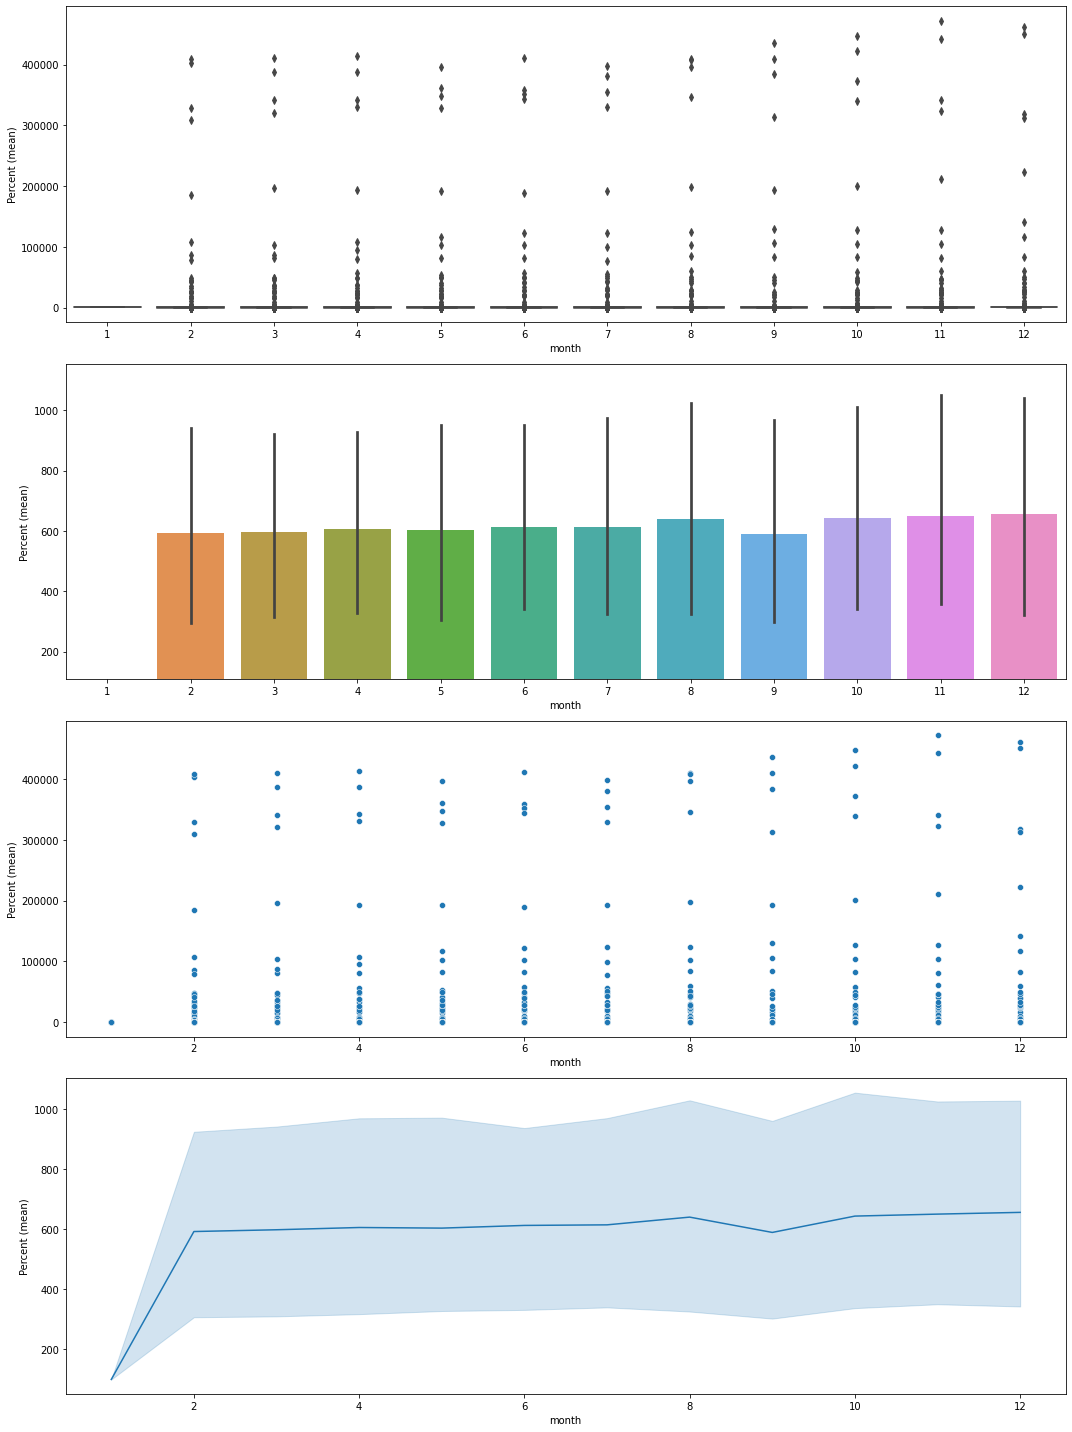

In [3]:
plot(x=Column.MONTH, y=Column.PERCENT, data=df, barplot={'quantile': (0.6, 0.994)})

## Weekly stock price fluctuations within a year

In [4]:
from analysis import get_best_week

df = get_best_week(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,week,Symbol,Percent (mean)
0,2011,1,VRTX,100.0
1,2011,2,VRTX,102.130682
2,2011,3,VRTX,112.102268
3,2011,4,VRTX,113.636361
4,2011,5,VRTX,110.624994
...,...,...,...,...
249817,2020,49,FE,56.000001
249818,2020,50,FE,60.884211
249819,2020,51,FE,64.631581
249820,2020,52,FE,63.200001


      Percent (mean)
week                
1         122.706237
2         166.476245
3         106.225554
4         168.461111
5         169.428628


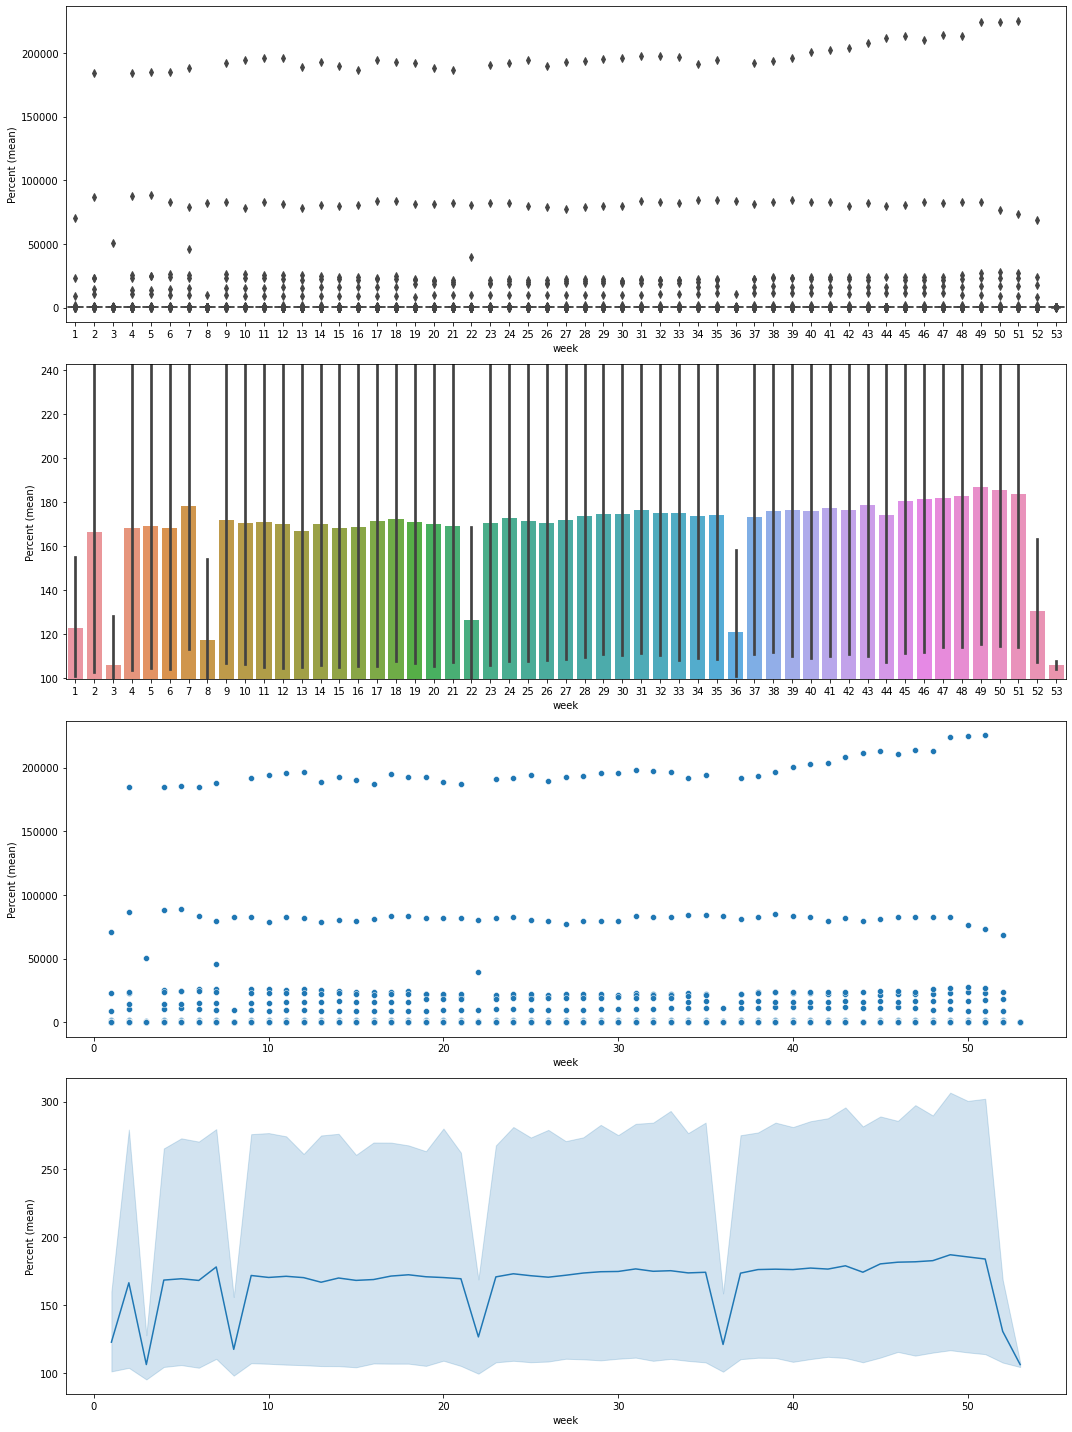

In [5]:
plot(x=Column.WEEK, y=Column.PERCENT, data=df, barplot={'quantile': (0.5, 0.998)})

## Daily stock price fluctuations within a month

In [6]:
from analysis import Column,get_best_month_day

df = get_best_month_day(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,month,day,Symbol,Percent (mean)
0,2016,7,5,FTV,100.0
1,2016,7,6,FTV,95.283401
2,2016,7,7,FTV,96.39676
3,2016,7,8,FTV,97.08502
4,2016,7,11,FTV,99.615383
...,...,...,...,...,...
1209969,2020,11,23,HON,120.360519
1209970,2020,11,24,HON,123.108751
1209971,2020,11,25,HON,122.931444
1209972,2020,11,27,HON,122.736408


     Percent (mean)
day                
1             100.0
2         99.824726
3         100.06518
4        100.007601
5        100.241902


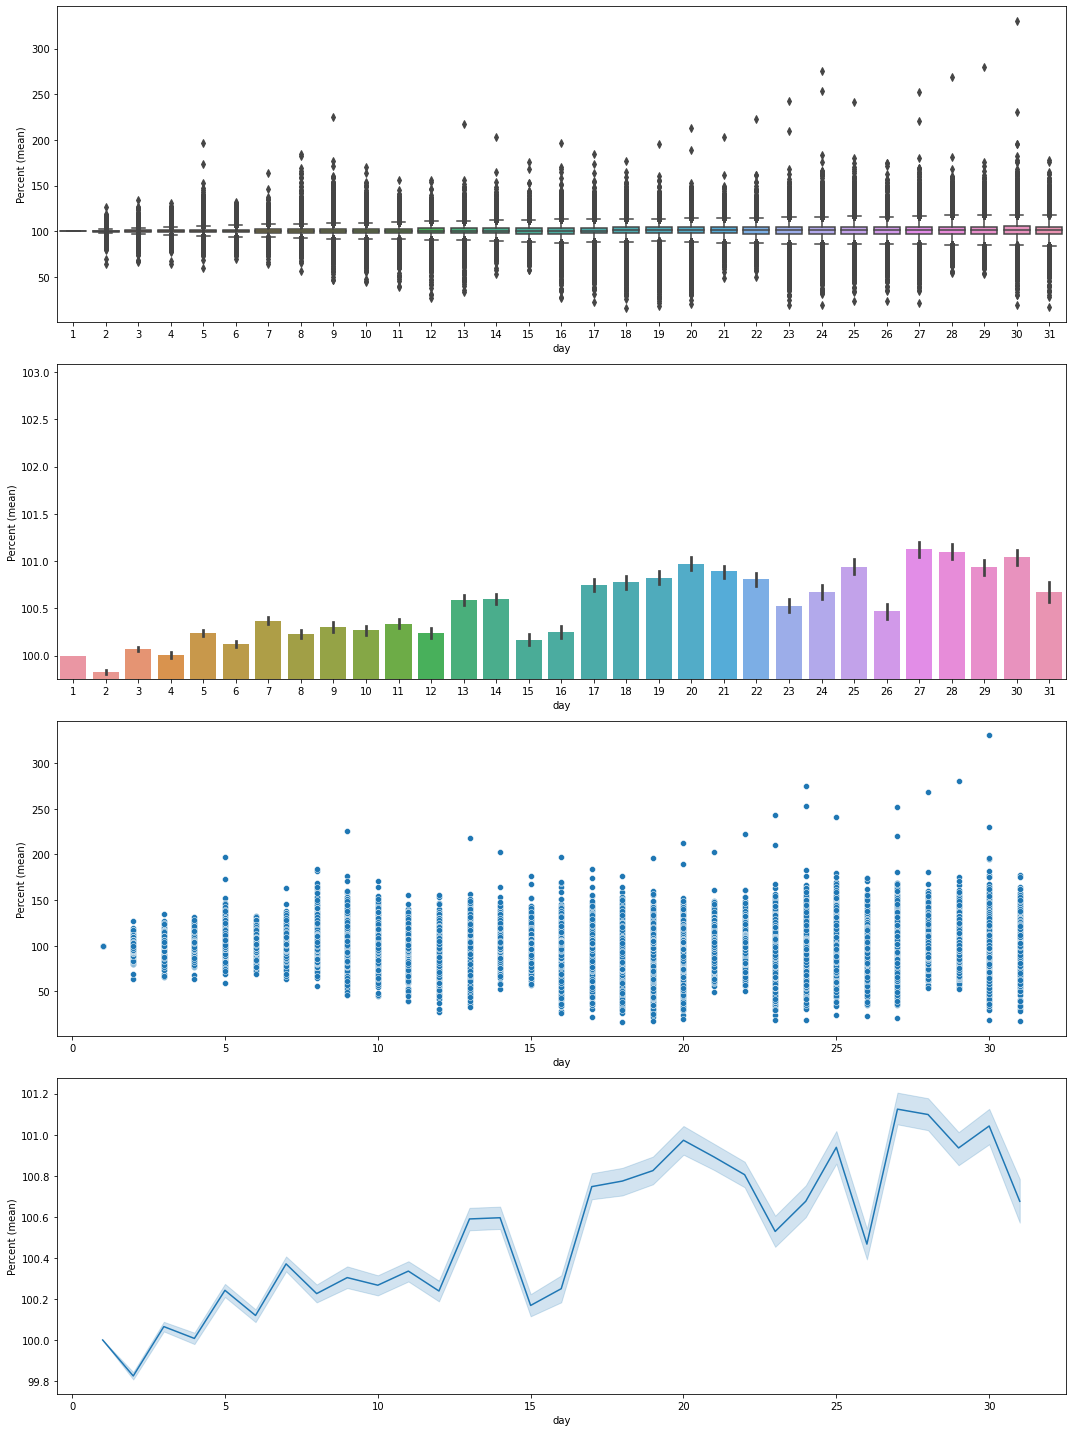

In [7]:
plot(x=Column.DAY, y=Column.PERCENT, data=df, barplot={'quantile': (0.4, 0.75)})

## Daily stock price fluctuations within a week

In [19]:
from analysis import get_best_weekday


df = get_best_weekday(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,week,weekday,Symbol,Percent (mean)
0,2016,27,1,FTV,100.0
1,2016,27,2,FTV,95.283401
2,2016,27,3,FTV,96.39676
3,2016,27,4,FTV,97.08502
4,2016,28,0,FTV,100.0
...,...,...,...,...,...
1208795,2020,51,4,HON,98.282404
1208796,2020,53,0,HON,100.0
1208797,2020,53,1,HON,100.189571
1208798,2020,53,2,HON,99.526066


         Percent (mean)
weekday                
0                 100.0
1            100.091577
2            100.086353
3            100.035454
4            100.123566


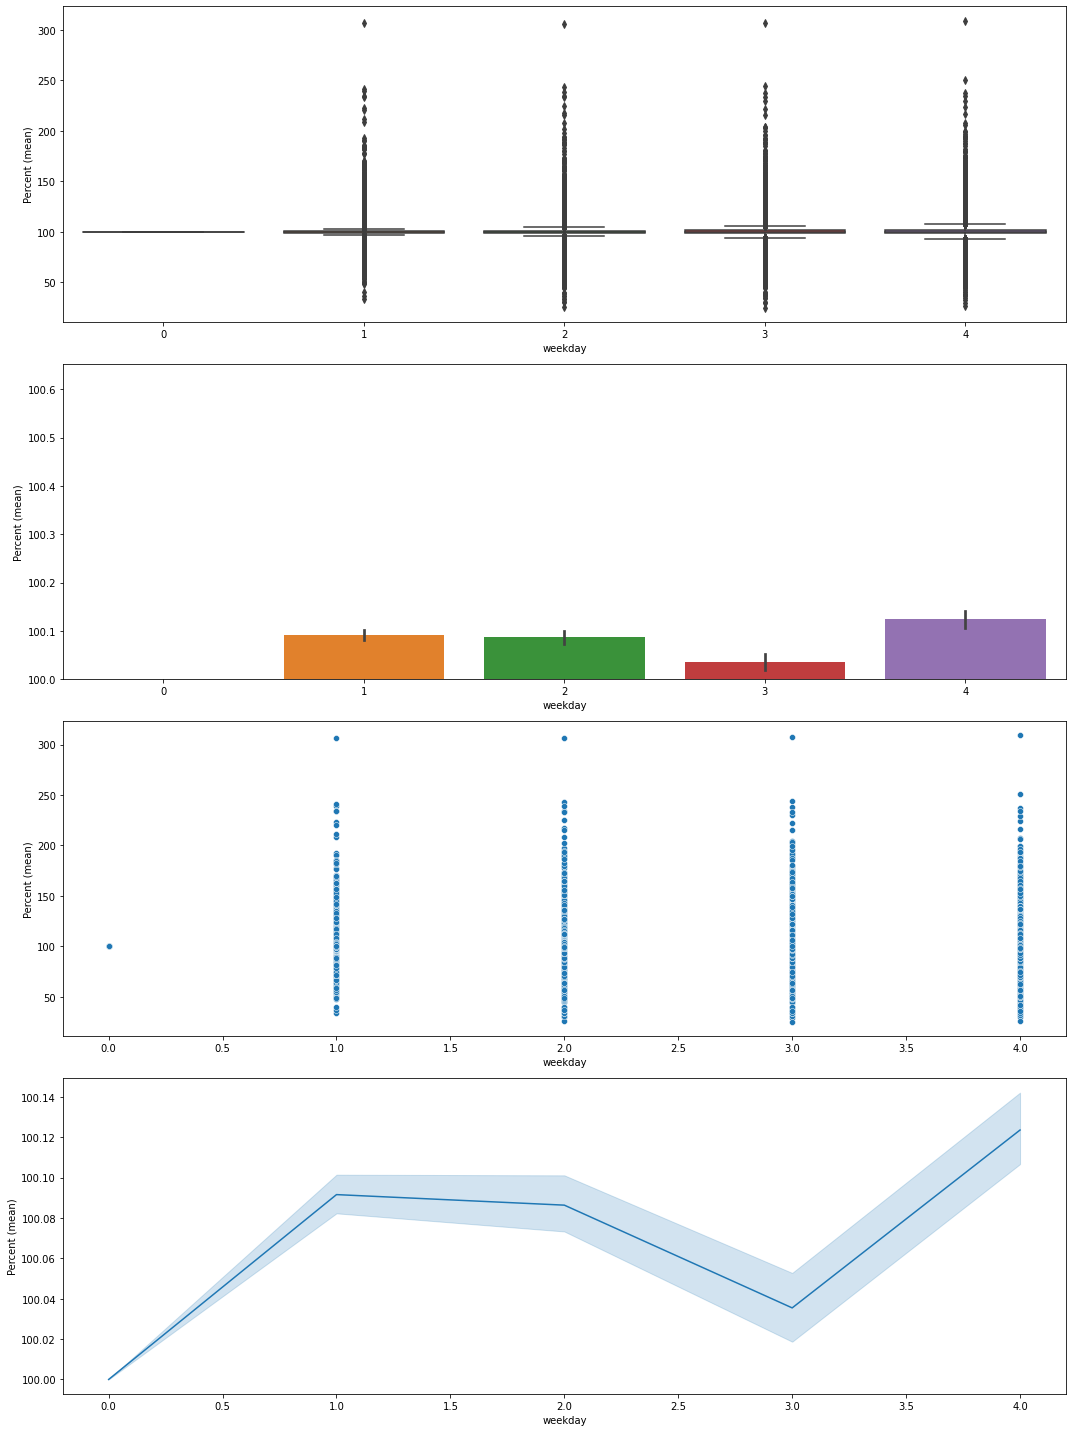

In [20]:
plot(x=Column.WEEKDAY, y=Column.PERCENT, data=df, barplot={'quantile': (0.4, 0.7)})

## Hourly stock price fluctuations with a day

In [10]:
# Yahoo support hour history only for 2 years
START_DATE = '2019-06-01'
END_DATE = '2021-05-01'

In [11]:
from analysis import get_best_hour

df = get_best_hour(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,week,day,hour,Symbol,Percent (mean)
0,2019,23,3,9,SRE,100.0
1,2019,23,3,10,SRE,99.613043
2,2019,23,3,11,SRE,99.38922
3,2019,23,3,12,SRE,99.339901
4,2019,23,3,13,SRE,99.658576
...,...,...,...,...,...,...
1631795,2021,17,30,11,FRC,99.246858
1631796,2021,17,30,12,FRC,99.176417
1631797,2021,17,30,13,FRC,99.352518
1631798,2021,17,30,14,FRC,99.696577


      Percent (mean)
hour                
9              100.0
10        100.014402
11        100.008636
12        100.030923
13        100.039122


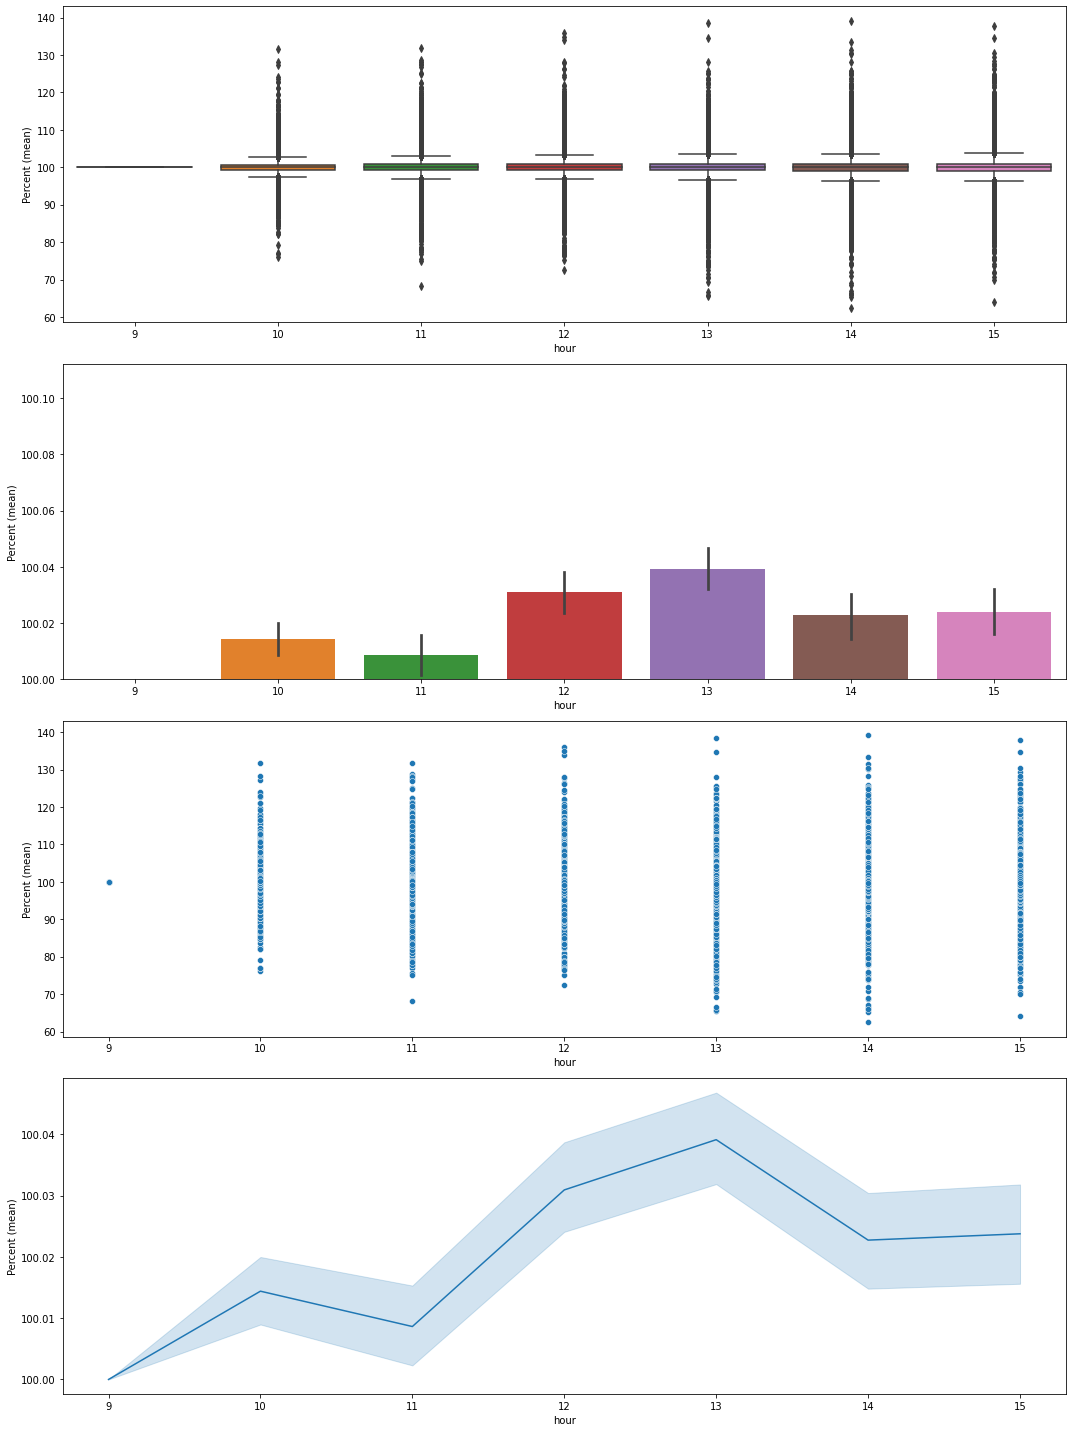

In [12]:
plot(x=Column.HOUR, y=Column.PERCENT, data=df, barplot={'quantile': (0.5, 0.6)})

## Hourly and quarterly stock price fluctuations within a day

In [13]:
# Yahoo support minute history only for 2 months
START_DATE = '2021-03-14'
END_DATE = '2021-05-11'

In [14]:
from analysis import get_best_time

df = get_best_time(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,week,day,hour,minute,time,Symbol,Percent (mean)
0,2021,11,15,9,30,9.5,CF,100.0
1,2021,11,15,9,45,9.75,CF,100.211863
2,2021,11,15,10,0,10.0,CF,99.636803
3,2021,11,15,10,15,10.25,CF,99.878932
4,2021,11,15,10,30,10.5,CF,100.302659
...,...,...,...,...,...,...,...,...
484919,2021,19,10,14,0,14.0,CHTR,100.105546
484920,2021,19,10,14,15,14.25,CHTR,99.912411
484921,2021,19,10,14,30,14.5,CHTR,99.712098
484922,2021,19,10,14,45,14.75,CHTR,99.475178


       Percent (mean)
time                 
9.50            100.0
9.75       100.005306
10.00       99.992883
10.25       99.994966
10.50      100.010451


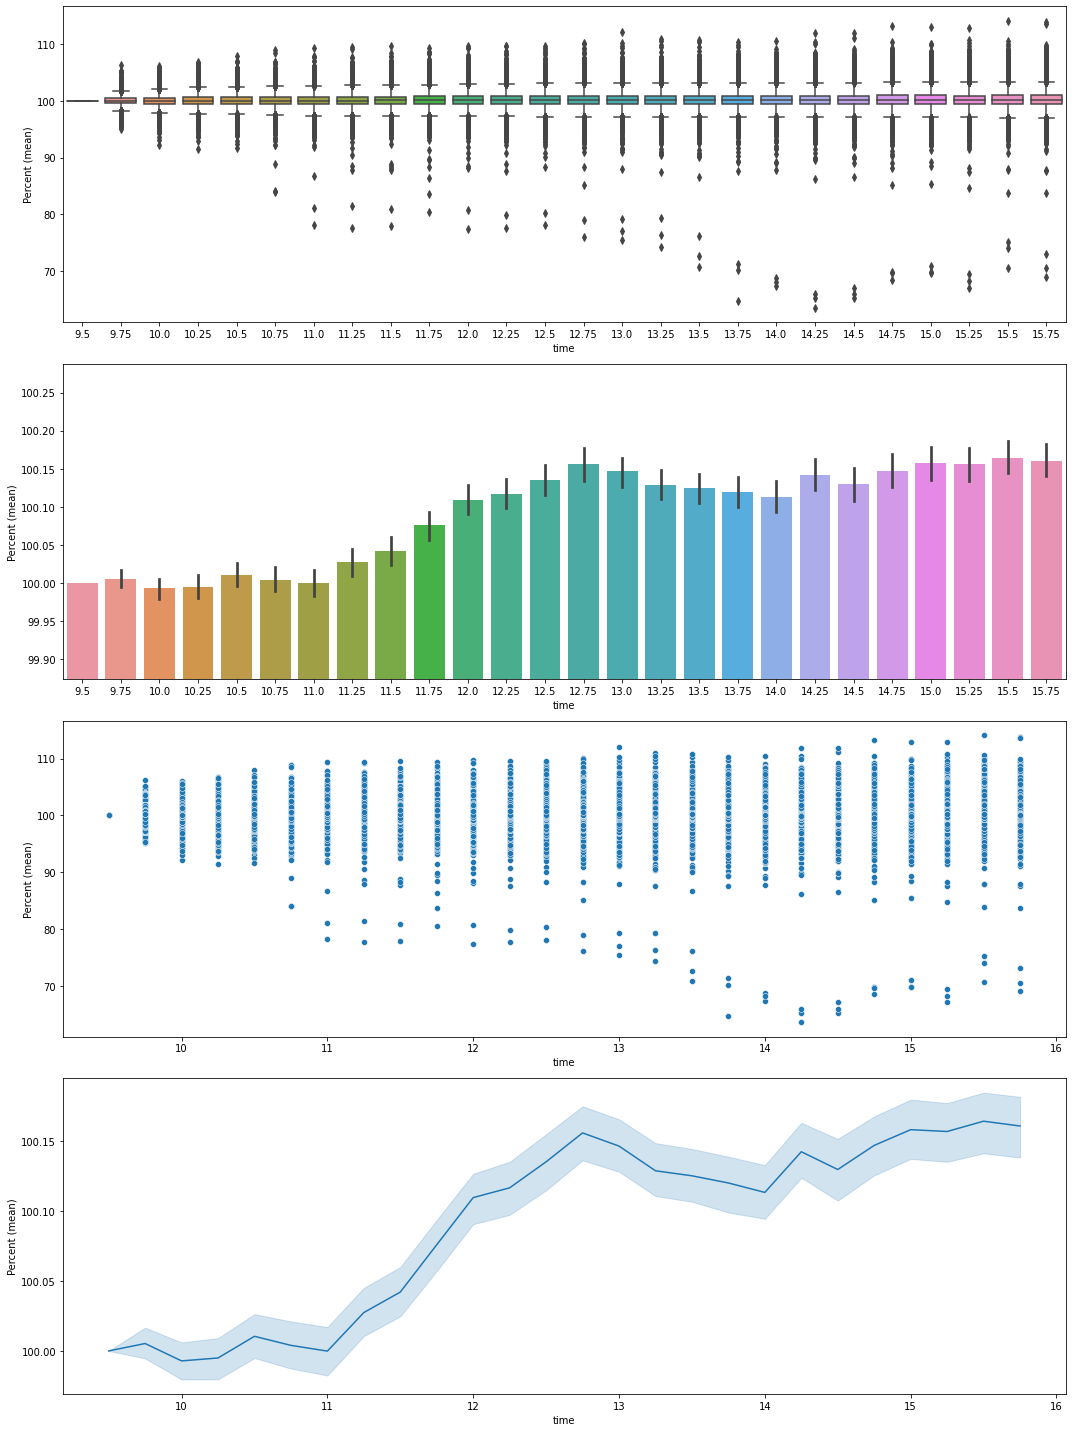

In [15]:
plot(x=Column.TIME, y=Column.PERCENT, data=df, barplot={'quantile': (0.40, 0.6)})

## Quarterly stock price fluctuations within an hour

In [16]:
from analysis import get_best_quarter

df = get_best_quarter(FILENAME, START_DATE, END_DATE, limit=LIMIT)

df

,year,week,day,hour,minute,quarter,Symbol,Percent (mean)
0,2021,11,15,9,30,30,CF,100.0
1,2021,11,15,9,45,45,CF,100.211863
2,2021,11,15,10,0,0,CF,100.0
3,2021,11,15,10,15,15,CF,100.243011
4,2021,11,15,10,30,30,CF,100.668283
...,...,...,...,...,...,...,...,...
483933,2021,19,10,13,45,45,CHTR,100.032916
483934,2021,19,10,14,0,0,CHTR,100.0
483935,2021,19,10,14,15,15,CHTR,99.807068
483936,2021,19,10,14,30,30,CHTR,99.606967


         Percent (mean)
quarter                
0                 100.0
15           100.004919
30           100.009187
45            100.01858


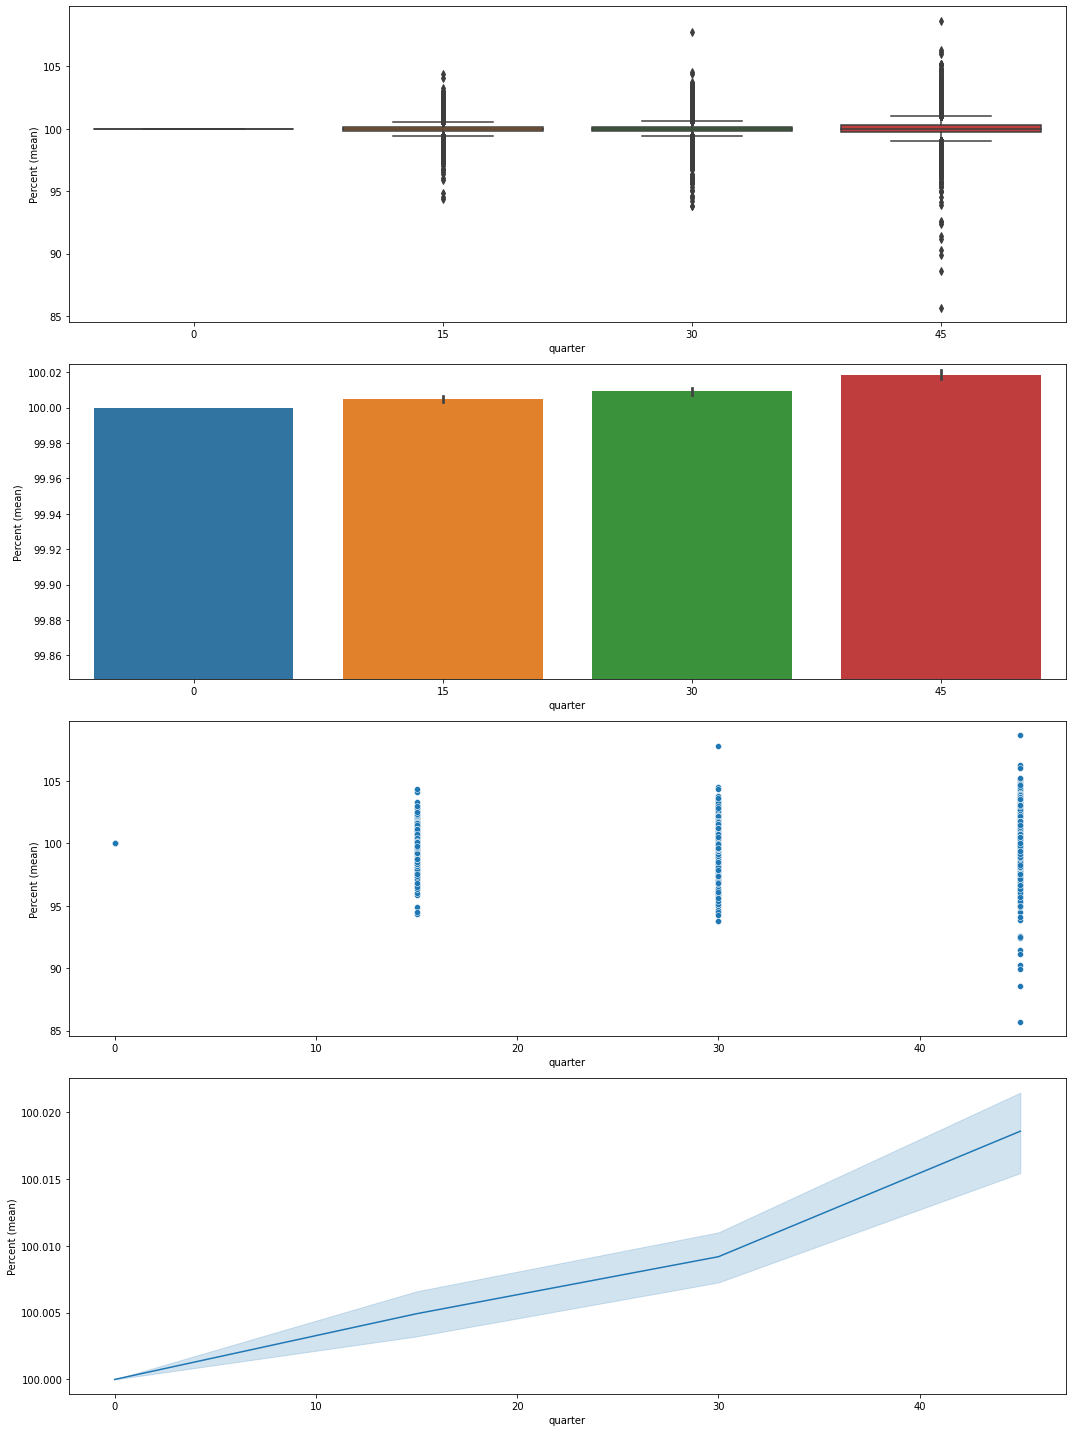

In [17]:
plot(x=Column.QUARTER, y=Column.PERCENT, data=df, barplot={'quantile': (0.20, 0.65)})